In [2]:
import mrc #All functionality for the MRC is included in this library
import matplotlib.pyplot as plt

mrr = mrc.Console(frequency=8.07e6)              # Connect to the MRR and initialize the system

AttributeError: module 'mrc' has no attribute 'Console'

## Run a CPMG T2 Experiment

In [6]:
mrr.calibrate()          # Run automatic calibration

loading sequence
STATUS: Done

STATUS: Done

STATUS: Done

Received Bytes: 1856

Frequency: 8072343
STATUS: Done



In [21]:
import numpy as np
mrr.amp(1000)
mrr.freq(8.07e6)
mrr.run()
best_idx = np.argmax(np.abs(np.fft.fft(mrr.rx_data[200:256+200])))
best_freq = np.fft.fftfreq(256, d=1/100000)[best_idx]
print("Calculated Frequency: %d" % (8.07e6 - int(best_freq)))
# self.frequency = self.frequency - best_freq
# self.freq(self.frequency)

STATUS: Done

STATUS: Done

Received Bytes: 1856

Calculated Frequency: 8083281


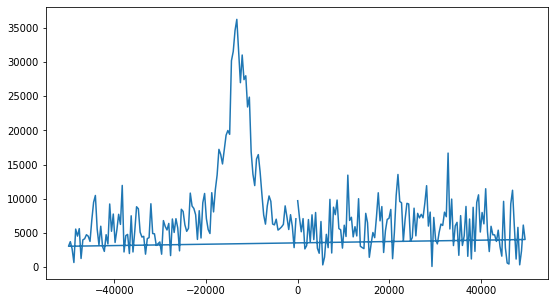

In [22]:
calfig = plt.figure(figsize=(9,5))
plt.plot(np.fft.fftfreq(256, d=1/100000), np.abs(np.fft.fft(mrr.rx_data[200:256+200])))
plt.show()

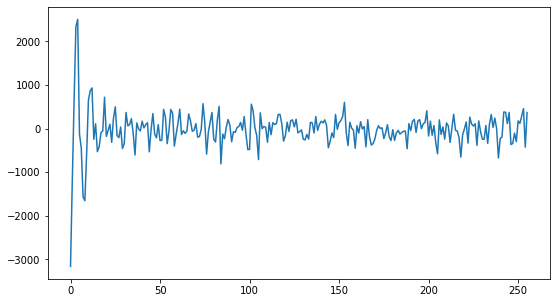

In [23]:
sefig = plt.figure(figsize=(9,5))
plt.plot(np.real(mrr.rx_data[200:200+256]))
# plt.plot(np.imag(mrr.rx_data))
plt.show()

loading sequence
STATUS: Done

Received Bytes: 120640



NameError: name 'get_t2' is not defined

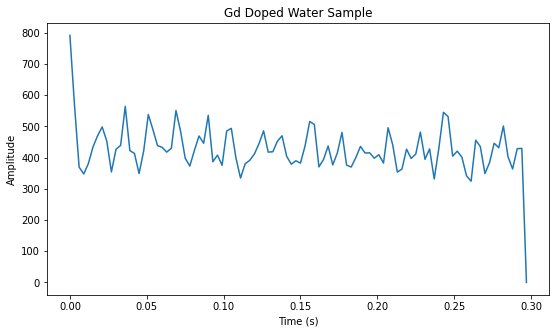

In [5]:
import time
t_echo = 3e-3
num_echoes = 100

echo_times, echo_amplitudes = mrr.run_cpmg(num_echoes, t_echo)

cpmg_fig = plt.figure(figsize=(9,5))                                      # Plot the results
plt.plot(echo_times, echo_amplitudes)
plt.title("Gd Doped Water Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(["$T_2$ = %0.2f" % (mrc.get_t2(echo_amplitudes, 3e-3))]) # Put the calculated T2 in the legend
plt.show()     

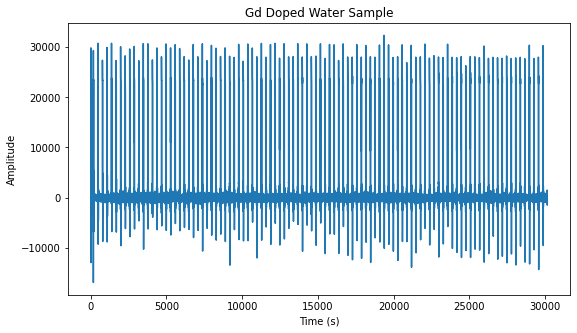

In [4]:
n_echos = 500   # Number of echoes
t_echo = 3e-3    # Echo Spacing
import numpy as np
# mrr.freq(7153000)
# time.sleep(1)

# echo_times, echo_amplitudes = mrr.run_cpmg(n_echos, t_echo) # Create and run a CPMG experiment
# mrr.load("mytestcpmg.mrc")
# mrr.run()


    

In [4]:
mrr.cdata

array([], dtype=complex128)

In [ ]:
def build_cpmg(echo_time, necho, t90, t180):
    seq = pp.Sequence(system=system)

    # RF pulse with a 90 degree flip angle
    rf90 = pp.make_block_pulse(flip_angle=90, duration=t90, system=system)
    rf180 = pp.make_block_pulse(flip_angle=180, duration=t180, phase_offset = np.pi/2, system=system)

    seq.add_block(rf90)
    seq.add_block(pp.make_delay(echo_time/2-t180/2))
    for i in range(necho):
        seq.add_block(rf180)
        seq.add_block(pp.make_delay(echo_time-t180))
    return seq

## Create a Custom Pulse Sequence

In [ ]:
import pypulseq as pp
import numpy as np

te = 1e-3
t90 = 200e-6
t180 = 200e-6

system = pp.Opts(max_grad=32, grad_unit='mT/m', max_slew=130, rf_raster_time=1/120e6, block_duration_raster=1/120e6, grad_raster_time=1/120e6, slew_unit='mT/m/ms')
seq = pp.Sequence(system=mrr.system)

# RF pulse with a 90 degree flip angle
rf90 = pp.make_block_pulse(flip_angle=90, duration=100/120e6, system=system)
rf180 = pp.make_block_pulse(flip_angle=180, duration=20/120e6, phase_offset = np.pi/2, system=system)


seq.add_block(rf180)
print(5000*120e-6)
seq.add_block(rf90)
seq.add_block(pp.make_delay(5000/120e6))
print(5000*120e-6)
seq.add_block(rf180)
seq.add_block(pp.make_delay(6000/120e6))

In [ ]:
result = mrr.run(seq)                                 # Run the custom sequence

spin_echo_fig = plt.figure()                          # Plot the results
plt.plot(np.real(result), np.imag(result))
plt.show()